In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_time_series .csv')

In [3]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [4]:
#Check missing data
df.isnull().any()

Day        False
Revenue    False
dtype: bool

In [5]:
#Convert the Day values to match deates in 2015
def convert_to_date(x):
    return datetime.date(2015,1,1) + datetime.timedelta(days = x - 1)
df['Date'] = df['Day'].apply(convert_to_date)
df

,Day,Revenue,Date
0,1,0.000000,2015-01-01
1,2,-0.292356,2015-01-02
2,3,-0.327772,2015-01-03
3,4,-0.339987,2015-01-04
4,5,-0.124888,2015-01-05
...,...,...,...
726,727,15.722056,2016-12-27
727,728,15.865822,2016-12-28
728,729,15.708988,2016-12-29
729,730,15.822867,2016-12-30


In [6]:
df.set_index('Date', drop = True, inplace = True)
df

,Day,Revenue
Date,,
2015-01-01,1,0.000000
2015-01-02,2,-0.292356
2015-01-03,3,-0.327772
2015-01-04,4,-0.339987
2015-01-05,5,-0.124888
...,...,...
2016-12-27,727,15.722056
2016-12-28,728,15.865822
2016-12-29,729,15.708988


In [7]:
#Drop unnecessary column
df2 = df[['Revenue']]
df2

,Revenue
Date,
2015-01-01,0.000000
2015-01-02,-0.292356
2015-01-03,-0.327772
2015-01-04,-0.339987
2015-01-05,-0.124888
...,...
2016-12-27,15.722056
2016-12-28,15.865822
2016-12-29,15.708988


In [8]:
#Drop the first row to get rid of 0 Revenue value
df2 = df2[df2['Revenue'] != 0]
df2

,Revenue
Date,
2015-01-02,-0.292356
2015-01-03,-0.327772
2015-01-04,-0.339987
2015-01-05,-0.124888
2015-01-06,-0.491590
...,...
2016-12-27,15.722056
2016-12-28,15.865822
2016-12-29,15.708988


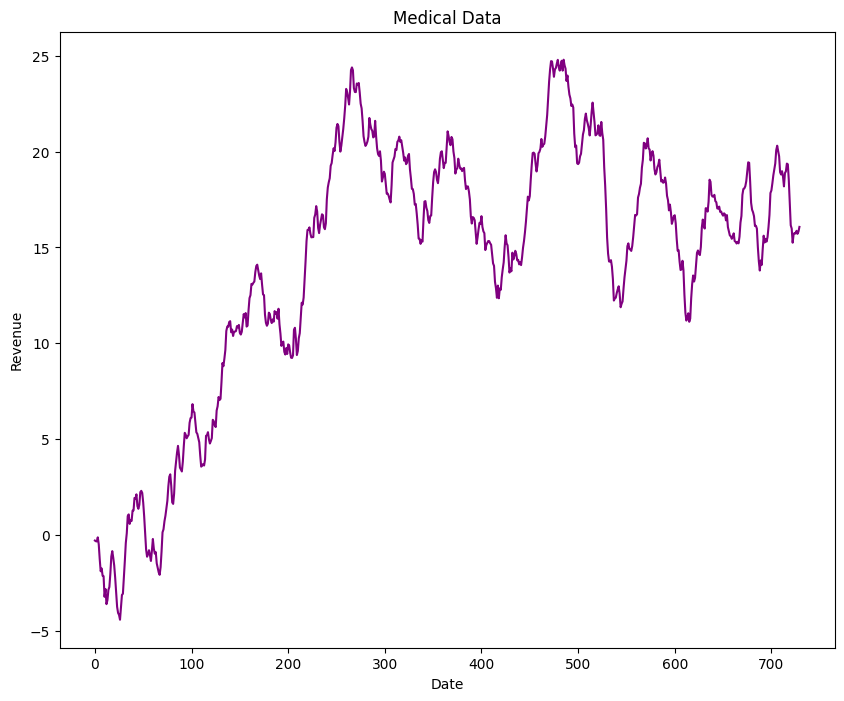

In [9]:
index = pd.Series(range(df2.shape[0]))
fig, ax = plt.subplots(figsize = (10,8))

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Medical Data')
plt.plot(index, df2.Revenue, color = 'purple')
plt.show()

In [10]:
#Use ADF to assess whether dataset is stationary or non-stationary 
df_test = ts.adfuller(df2['Revenue'], autolag = 'AIC')
df_op = pd.Series(df_test[0:4], index = ['ADF Statistic', 'p-Value', 'Lags', 'Observations'])
for key, value in df_test[4].items():
    df_op['Critical Value (%s)'%key] = value
df_op

ADF Statistic            -2.210771
p-Value                   0.202360
Lags                      1.000000
Observations            728.000000
Critical Value (1%)      -3.439364
Critical Value (5%)      -2.865518
Critical Value (10%)     -2.568888
dtype: float64

In [11]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 2015-01-02 to 2016-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  730 non-null    float64
dtypes: float64(1)
memory usage: 11.4+ KB
None


In [12]:
df2.head()

,Revenue
Date,
2015-01-02,-0.292356
2015-01-03,-0.327772
2015-01-04,-0.339987
2015-01-05,-0.124888
2015-01-06,-0.491590


In [13]:
#Transform dataset to stationary by using differencing (subtracting each point from the previous value).
df_stationary = df2.diff(periods = 1, axis = 0).dropna()
print(df_stationary.info())
print(df_stationary.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 2015-01-03 to 2016-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Revenue  729 non-null    float64
dtypes: float64(1)
memory usage: 11.4+ KB
None
(729, 1)


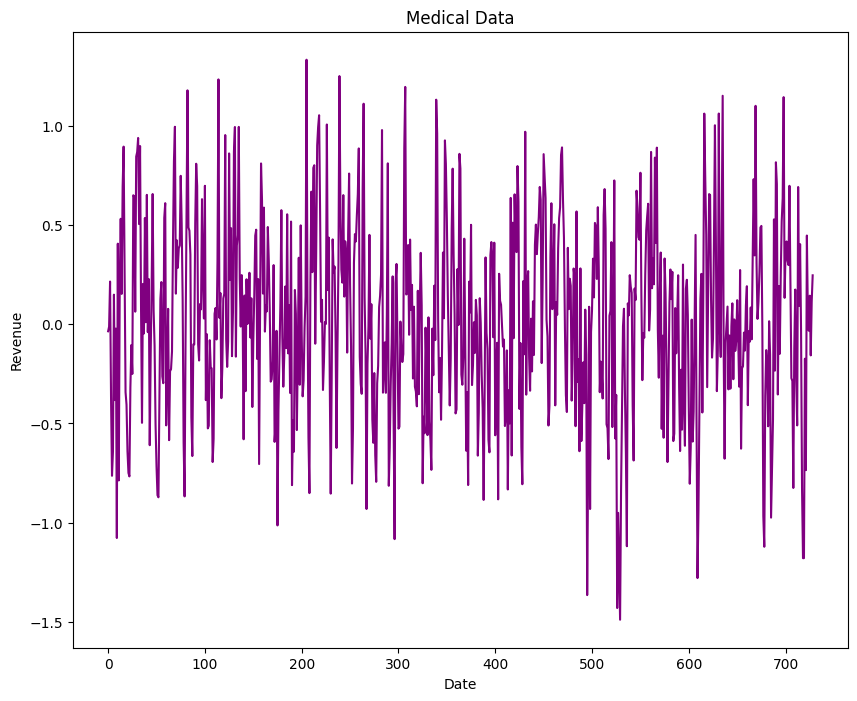

In [14]:
index2 = pd.Series(range(df_stationary.shape[0]))
fig, ax = plt.subplots(figsize = (10,8))

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Medical Data')
plt.plot(index2, df_stationary.Revenue, color = 'purple')
plt.show()

In [15]:
#Use ADF to reassess whether updated dataset is stationary or non-stationary 
df_test2 = ts.adfuller(df_stationary['Revenue'], autolag = 'AIC')
df_op2 = pd.Series(df_test2[0:4], index = ['ADF Statistic', 'p-Value', 'Lags', 'Observations'])
for key, value in df_test2[4].items():
    df_op2['Critical Value (%s)'%key] = value
df_op2

ADF Statistic          -1.735420e+01
p-Value                 5.249586e-30
Lags                    0.000000e+00
Observations            7.280000e+02
Critical Value (1%)    -3.439364e+00
Critical Value (5%)    -2.865518e+00
Critical Value (10%)   -2.568888e+00
dtype: float64

In [16]:
#Create Training and Test, keeping the recommended 4:1 ratio
test_size = int(.20 * df_stationary.shape[0])
train, test = train_test_split(df2, test_size = test_size, shuffle = False, random_state = 22)

In [17]:
acf = acf((train['Revenue'].values))
acf_df = pd.DataFrame([acf]).T
acf_df.columns = ['ACF']

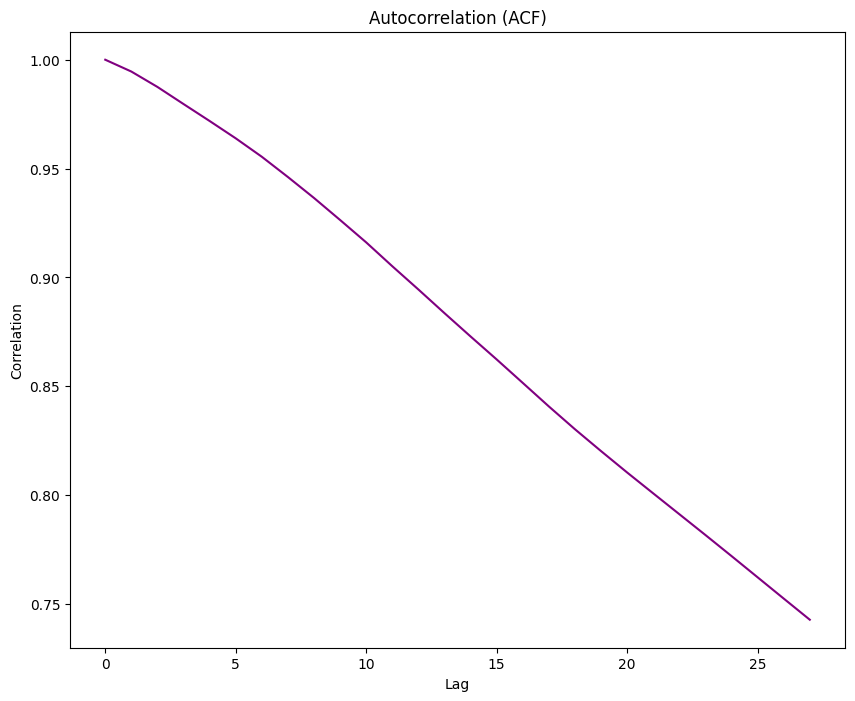

In [18]:
#ACF Visualization
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(acf_df.ACF, 'purple')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Autocorrelation (ACF)')
plt.show()

In [19]:
pacf = pacf((train['Revenue'].values))
pacf_df = pd.DataFrame([pacf]).T
pacf_df.columns = ['PACF']

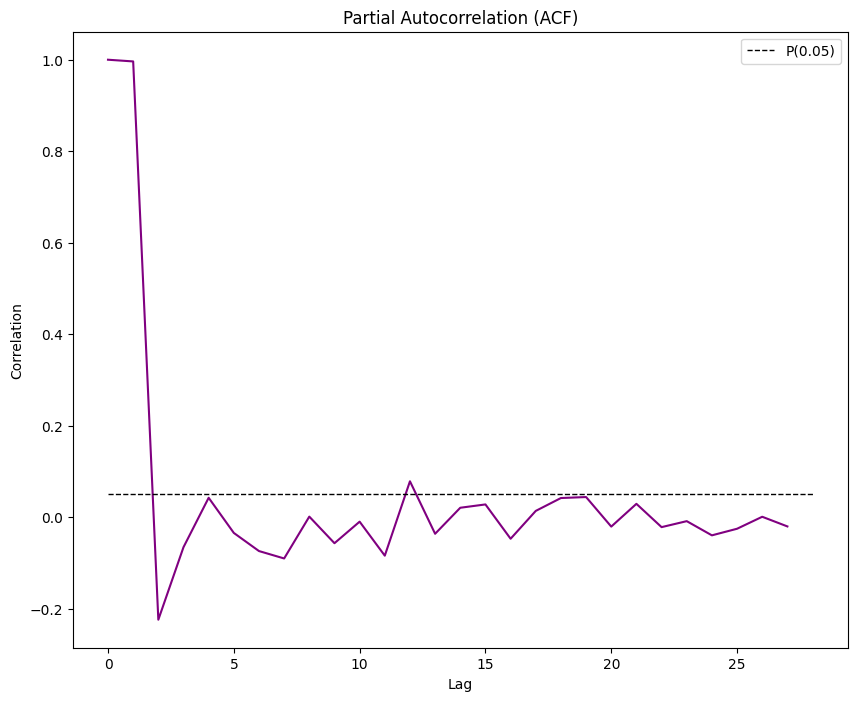

In [20]:
#PACF Visualization
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(pacf_df.PACF, 'purple')
ax.hlines(y = 0.05, xmin = 0, xmax = len(pacf), lw = 1, linestyles = '--', color = 'black', label = 'P(0.05)')
ax.legend()
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Partial Autocorrelation (ACF)')
plt.show()

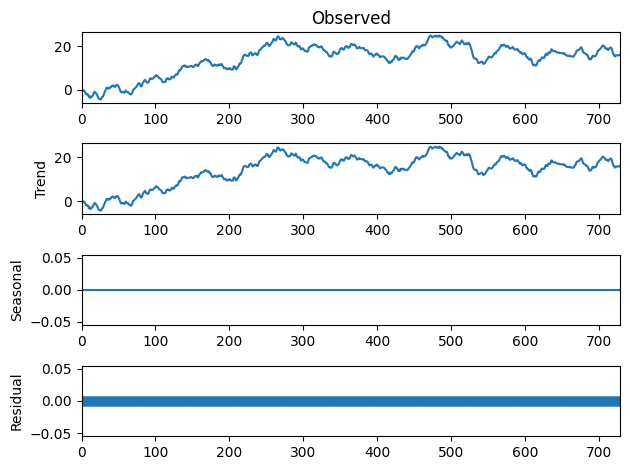

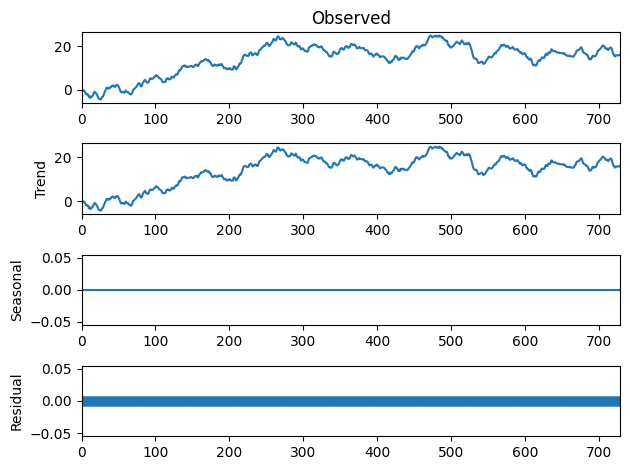

In [21]:
#Decomposing visualizations
decomp = seasonal_decompose(df2['Revenue'].values, model = 'additive', period = 1)
decomp.plot()

In [22]:
df2.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 1/data/task_1_df2_cleaned.csv')

In [23]:
df_stationary.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d213_advanced_data_analytics/Task 1/data/task_1_df2_cleaned.csv')

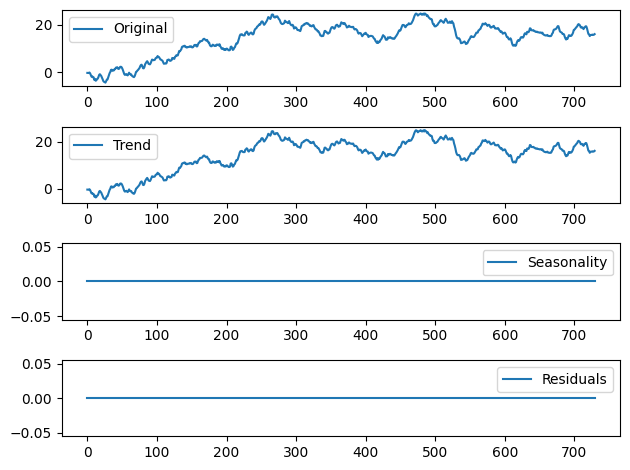

In [26]:
decomposition = seasonal_decompose(df2['Revenue'].values, model = 'additive', period = 1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df2['Revenue'].values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

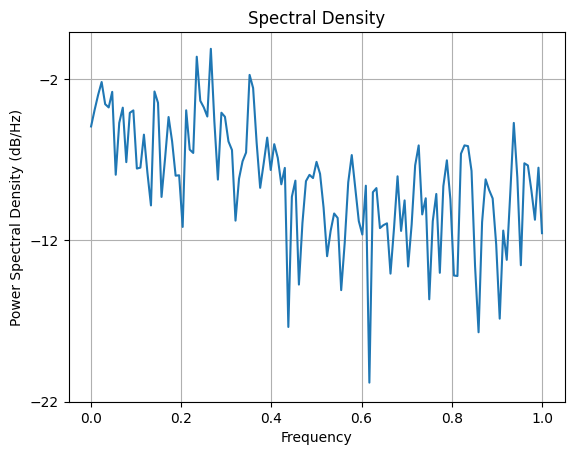

In [28]:
plt.psd(df_stationary['Revenue'])
plt.title('Spectral Density')
plt.show()

c:\Users\nsgoo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting AR model


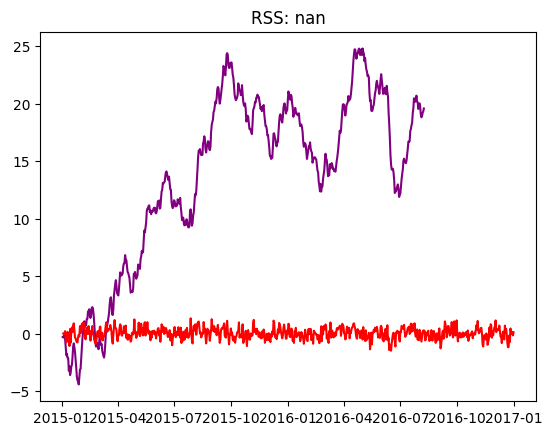

In [40]:
#AR MODEL
model1 = ARIMA(df_stationary, order=(0, 1, 0 ), freq='D')
results_AR = model1.fit()
plt.plot(train['Revenue'], color = 'purple')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - train['Revenue'])**2))
print('Plotting AR model')
# you can experiment with different p,d,q values but the lowest RSS is 1.0292 for the values 2,1,2

In [ ]:
model2 = sm.tsa.SARIMAX (train, order = (3, 0, 1), seasonal_order = (2, 1, 0, 12), freq = 'D', enforce_stationarity = False, enforce_inertibility = False)
arima = model2.fit()

c:\Users\nsgoo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


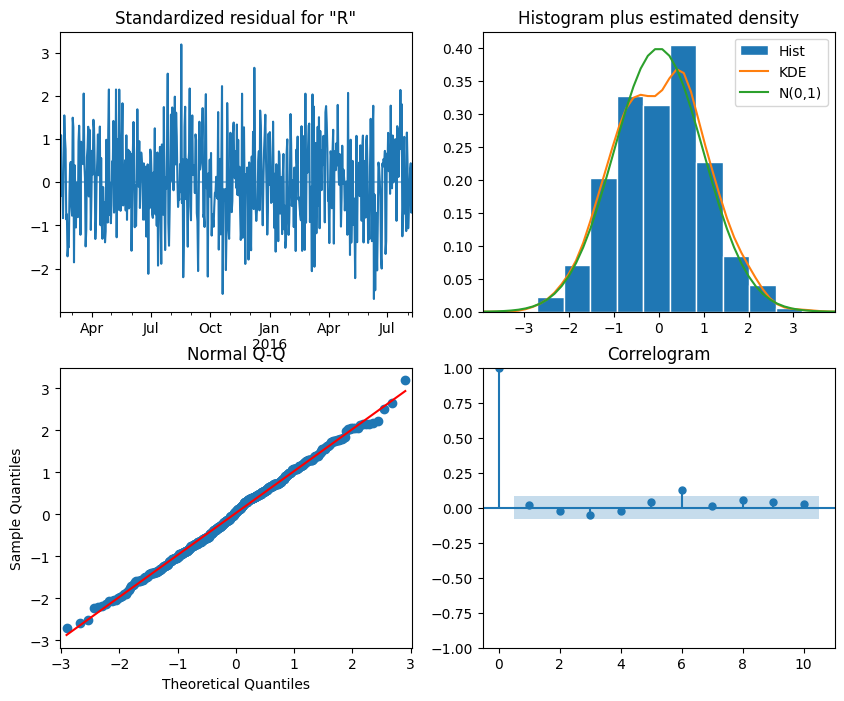

In [ ]:
arima.plot_diagnostics(figsize = (10, 8))
plt.show()

In [ ]:
#Fit and generate model
X_train = np.array(train['Revenue'])
model = ARIMA(X_train, order = (0, 1, 0))
arima = model.fit()
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -404.871
Date:                Sat, 17 Dec 2022   AIC                            811.742
Time:                        07:58:18   BIC                            816.112
Sample:                             0   HQIC                           813.445
                                - 585                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2343      0.014     16.398      0.000       0.206       0.262
Ljung-Box (L1) (Q):                  97.90   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.00   Pr

In [ ]:
# create final model 
model3 = ARIMA(df['Revenue'], order=(1,1,0))
results = model3.fit()
results.summary()

c:\Users\nsgoo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\nsgoo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\nsgoo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -437.991
Date:                Sat, 17 Dec 2022   AIC                            879.982
Time:                        07:58:18   BIC                            889.168
Sample:                    01-01-2015   HQIC                           883.526
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# make forecast outside of sample
results.forecast(30)

2017-01-01    16.171559
2017-01-02    16.213862
2017-01-03    16.231384
2017-01-04    16.238642
2017-01-05    16.241649
2017-01-06    16.242894
2017-01-07    16.243410
2017-01-08    16.243623
2017-01-09    16.243712
2017-01-10    16.243749
2017-01-11    16.243764
2017-01-12    16.243770
2017-01-13    16.243773
2017-01-14    16.243774
2017-01-15    16.243774
2017-01-16    16.243774
2017-01-17    16.243774
2017-01-18    16.243774
2017-01-19    16.243774
2017-01-20    16.243774
2017-01-21    16.243774
2017-01-22    16.243774
2017-01-23    16.243774
2017-01-24    16.243774
2017-01-25    16.243774
2017-01-26    16.243774
2017-01-27    16.243774
2017-01-28    16.243774
2017-01-29    16.243774
2017-01-30    16.243774
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
df2.tail(30)

,Revenue
Date,
2016-12-02,17.970498
2016-12-03,18.343148
2016-12-04,18.760310
2016-12-05,19.080317
2016-12-06,19.378591
2016-12-07,20.076182
2016-12-08,20.307137
2016-12-09,20.035505
2016-12-10,19.750009


In [ ]:
# prediction for last 30-days
predictions = results.predict(start=700, end=730, type='levels')
print(predictions)

2016-12-01    16.955407
2016-12-02    18.311505
2016-12-03    18.025613
2016-12-04    18.497504
2016-12-05    18.933104
2016-12-06    19.212868
2016-12-07    19.502139
2016-12-08    20.365133
2016-12-09    20.402801
2016-12-10    19.922991
2016-12-11    19.631753
2016-12-12    18.583366
2016-12-13    18.753410
2016-12-14    19.050890
2016-12-15    18.576199
2016-12-16    17.973008
2016-12-17    19.162225
2016-12-18    19.006939
2016-12-19    19.539338
2016-12-20    19.324263
2016-12-21    18.170665
2016-12-22    16.845458
2016-12-23    15.666896
2016-12-24    15.909530
2016-12-25    14.941674
2016-12-26    15.878371
2016-12-27    15.780235
2016-12-28    15.708514
2016-12-29    15.925371
2016-12-30    15.644025
2016-12-31    15.870038
Freq: D, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Final Model Predictions vs Test Data')

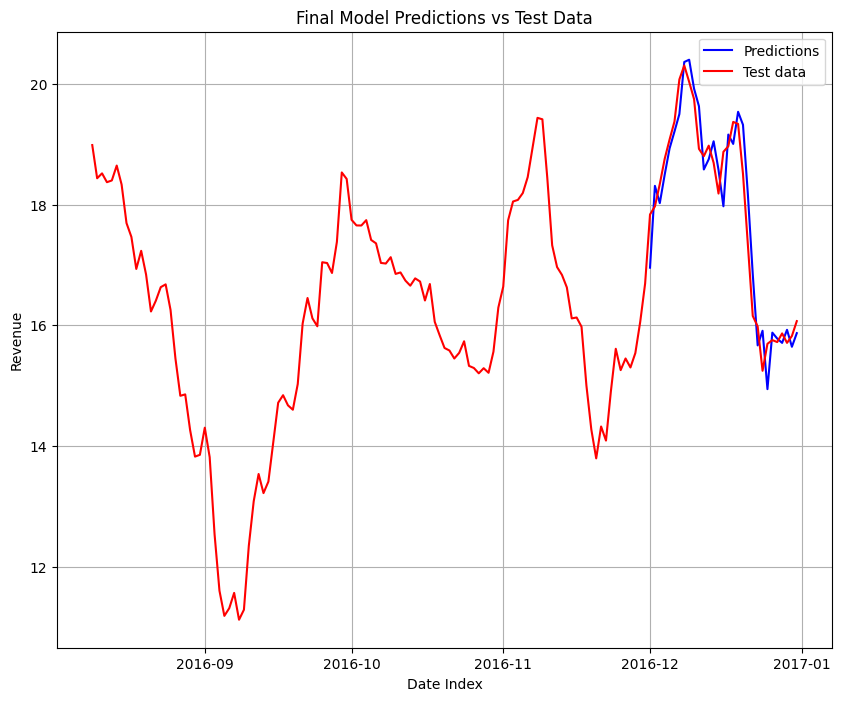

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))
pred = plt.plot(predictions, "b", label='Predictions')
plt.plot(test['Revenue'], "r", label='Test data')
plt.xlabel("Date Index")
plt.ylabel("Revenue")
title = 'Final Model Predictions vs Test Data'
plt.legend()
plt.grid()
plt.title(title)